In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("/content/Telco_IBM_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Removing Customer Id as it of no use...

In [5]:
df = df.drop(['customerID'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [8]:
df.value_counts(['Churn'])

,count
Churn,
No,5174
Yes,1869


In [9]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

it is in string form, lets covert it to int.

In [15]:
df = df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ' '

There are some blank spaces in 'TotalCharges' Column

In [16]:
df[df['TotalCharges'].str.match(" ")==True]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
(df['TotalCharges'].str.match("^ ") == True).sum()

np.int64(11)

Total 11 Blank values in "TotalCharges"

In [18]:
mask = (df['TotalCharges'].str.match("^ ") == False)
df1 = df[mask]

In [19]:
((df1['TotalCharges'].str.match("^ ") == True)).sum()

np.int64(0)

Removed Blank spaces from "TotalCharges".

In [21]:
df1['TotalCharges'] = df1['TotalCharges'].astype('float')

<ipython-input-21-58c899e30c05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['TotalCharges'].astype(float)


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [23]:
df1['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Churn Vs *Tenure*

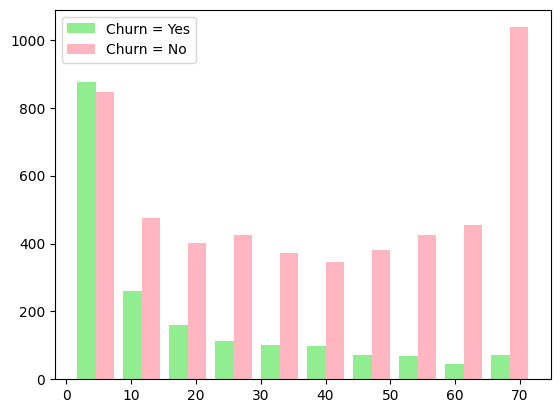

In [26]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
plt.xlabel = ("tenure")
plt.ylabel = ("Customers")
plt.title =("Customer Churn vs Tenure")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['lightgreen', 'lightpink'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

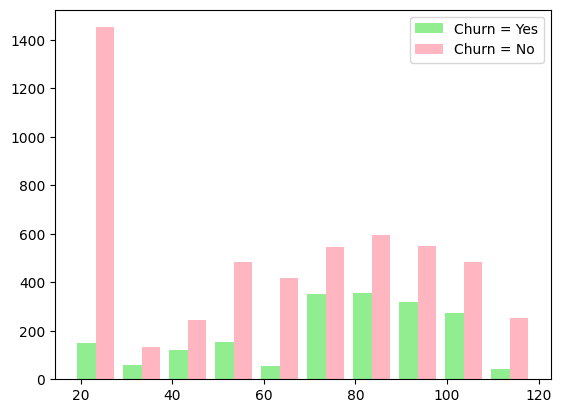

In [27]:
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
plt.xlabel = ("Monthly Charges")
plt.ylabel= ("Customers")
plt.title = ("Customer Churn vs Monthly Charges")

plt.hist([mc_churn_yes, mc_churn_no], color=['lightgreen', 'lightpink'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

Since Many attributes have categorical values, Let's encode them....

In [28]:
def UAC(df):
  for col in df:
    if(df[col].dtypes == 'object'):
      print(col, ":",  df[col].unique())

UAC(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Since "No" and "No internet service" are equal, We will convert it to "No"

In [29]:
def NoConverter(df):
  for col in df:
    if(df[col].dtype == 'object'):
      if(df[col].str.contains('^No internet service$' ,case=False, na=False).any()):
        df[col] = df[col].str.replace("^No internet service", "No", regex=True)
      if(df[col].str.contains('^No phone service$' ,case=False, na=False).any()):
        print("col")
        df[col] = df[col].str.replace("^No phone service", "No", regex = True)

NoConverter(df1)

col


<ipython-input-29-67f63a2669cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace("^No phone service", "No", regex = True)
<ipython-input-29-67f63a2669cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace("^No internet service", "No", regex=True)


In [30]:
UAC(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Based on the following table, it will be encoded

| Feature          | Encoding Type | Reason                                              |
|-----------------|--------------|-----------------------------------------------------|
| Gender         | Label         | Binary category, label encoding suffices          |
| Partner        | Label         | Binary category, label encoding suffices          |
| Dependents     | Label         | Binary category, label encoding suffices          |
| PhoneService   | Label         | Binary category, label encoding suffices          |
| MultipleLines  | Label         | Binary category, label encoding suffices          |
| InternetService | One-Hot       | Three categories, one-hot avoids ordinal bias     |
| OnlineSecurity | Label         | Binary category, label encoding suffices          |
| OnlineBackup   | Label         | Binary category, label encoding suffices          |
| DeviceProtection | Label       | Binary category, label encoding suffices          |
| TechSupport    | Label         | Binary category, label encoding suffices          |
| StreamingTV    | Label         | Binary category, label encoding suffices          |
| StreamingMovies | Label        | Binary category, label encoding suffices          |
| Contract       | One-Hot       | Three categories, one-hot avoids ordinal bias     |
| PaperlessBilling | Label       | Binary category, label encoding suffices          |
| PaymentMethod  | One-Hot       | Four categories, one-hot avoids ordinal bias      |
| Churn          | Label         | Binary category, label encoding suffices          | **bold text**


In [31]:
df2 = df1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def EncFunc(df):
  oneHotCol = []
  df = df.copy()
  for col in df:
    if(df[col].dtype == 'object'):
      if(len(df[col].unique()) == 2):
        df[col] = label_encoder.fit_transform(df[col])
      elif(len(df[col].unique()) > 2):
        oneHotCol.append(col)

  df = pd.get_dummies(df, columns = oneHotCol, dtype=int, drop_first=True)
  return df

df2 = EncFunc(df2)

In [32]:
UAC(df2)

In [33]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [34]:
df2.shape

(7032, 24)

In [35]:
df2.std()

,0
gender,0.500014
SeniorCitizen,0.368844
Partner,0.499729
Dependents,0.457629
tenure,24.545260
PhoneService,0.295571
MultipleLines,0.493902
OnlineSecurity,0.452180
OnlineBackup,0.475354
DeviceProtection,0.475028


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ColToScale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df2[ColToScale] = scaler.fit_transform(df2[ColToScale])

In [37]:
df2.std()

,0
gender,0.500014
SeniorCitizen,0.368844
Partner,0.499729
Dependents,0.457629
tenure,0.345708
PhoneService,0.295571
MultipleLines,0.493902
OnlineSecurity,0.452180
OnlineBackup,0.475354
DeviceProtection,0.475028


In [38]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,0.662189,0.227521,0,0,0,1,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0.845274,0.847461,0,1,0,1,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,0.112935,0.037809,0,0,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0.558706,0.033210,1,1,0,0,0,0,0,1


In [39]:
from sklearn.feature_selection import mutual_info_classif
X=df2.drop(columns = ['Churn'])
y =df2['Churn']
miScore = mutual_info_classif(X,y,discrete_features='auto')
mi_series = pd.Series(miScore, index=X.columns).sort_values(ascending = True)
print(mi_series)

PhoneService                             0.000000
OnlineBackup                             0.000000
StreamingMovies                          0.000000
StreamingTV                              0.000697
SeniorCitizen                            0.001729
DeviceProtection                         0.001914
PaymentMethod_Credit card (automatic)    0.001918
gender                                   0.002185
PaymentMethod_Mailed check               0.007961
MultipleLines                            0.008146
TechSupport                              0.010848
OnlineSecurity                           0.011425
Dependents                               0.015308
Partner                                  0.016850
InternetService_No                       0.021548
PaperlessBilling                         0.025594
Contract_One year                        0.030478
TotalCharges                             0.043292
PaymentMethod_Electronic check           0.049093
InternetService_Fiber optic              0.049322


In [40]:
df3 = df2[["tenure", "Contract_Two year", "InternetService_Fiber optic", "PaymentMethod_Electronic check", "TotalCharges", "MonthlyCharges", "Churn"]]

In [41]:

df3.shape

(7032, 7)

In [45]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['Churn'])
y = df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


In [46]:
X_train.shape

(5625, 23)

In [47]:
X_test.shape

(1407, 23)

In [48]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,1,0,1,1,0.901408,1,1,1,1,1,...,0,0.759204,0.699279,1,0,0,1,1,0,0
7003,1,0,0,0,0.352113,0,0,0,0,1,...,0,0.174129,0.115820,0,0,0,0,0,1,0
3355,0,0,1,0,0.943662,1,1,0,1,1,...,0,0.715920,0.724538,1,0,0,1,1,0,0
4494,1,0,0,0,0.028169,1,0,0,1,0,...,0,0.657214,0.024954,1,0,0,0,0,1,0
3541,0,0,1,0,0.676056,0,0,1,0,0,...,0,0.222886,0.236782,0,0,0,0,0,0,0


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


classifier = Sequential()

classifier.add(Dense(units = 23, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(units = 8, activation = 'relu'))

classifier.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate = 0.005)

classifier.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])

classifier.fit(X_train, y_train, epochs=100)
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# classifier.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5503 - loss: 0.7707
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.4333
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7824 - loss: 0.4485
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7829 - loss: 0.4380
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.4359
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7882 - loss: 0.4321
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8031 - loss: 0.4261
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7974 - loss: 0.4324
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7924 - loss: 0.4341
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - loss: 0.4409
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7885 - loss: 0.4255
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [57]:
from sklearn.metrics import accuracy_score
y_pred_ANN = classifier.predict(X_test)
y_pred_bin_ANN = (y_pred_ANN > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_bin_ANN)
print(accuracy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.7874911158493249


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_bin_ANN))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XG_model = XGBClassifier(n_estimators=400, learning_rate=0.01, max_depth=6, subsample=0.4, colsample_bytree=0.6, random_state=42)
# XG_model = XGBClassifier(n_estimators=500, learning_rate=0.02, max_depth=5, subsample=0.3, colsample_bytree=0.4, random_state=42)
# XG_model = XGBClassifier()
XG_model.fit(X_train, y_train)
XG_train_pred = XG_model.predict(X_train)
XG_test_pred = XG_model.predict(X_test)
train_Acc = accuracy_score(y_train, XG_train_pred)
test_Acc = accuracy_score(y_test, XG_test_pred)
print(train_Acc)
print(test_Acc)

0.8360888888888889
0.7931769722814499


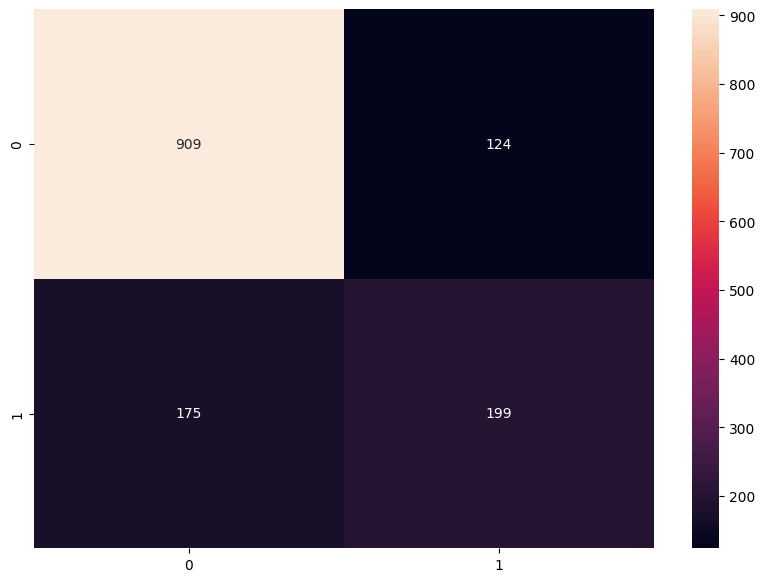

In [61]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_bin_ANN)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel= ('Predicted')
plt.ylabel= ('Truth')